<a href="https://colab.research.google.com/github/jogong2718/AI_club/blob/main/Intro_to_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


One-Hot-Encode

In [12]:
trainingLabelsohe = tf.keras.utils.to_categorical(training_labels)
testLabelsohe = tf.keras.utils.to_categorical(test_labels)

#Dropout: This is a type of layer that has an interesting function. It is the main layer we use to counter [overfitting](https://en.wikipedia.org/wiki/Overfitting). 

We call the Dropout layer as follows

```
tf.keras.layers.Dropout(x)
```

x is a number between 0 and 1. Normally, one would use a number like 0.2. 
Dropout's function is that it essentially cancels out the function of some neurons of the layer before it.

<img src="https://www.tech-quantum.com/wp-content/uploads/2018/11/1_iWQzxhVlvadk6VAJjsgXgg1.png">

This effectively makes the model smaller. We do this to essentially find the "useless" neurons that we don't want. This is to reduce the "noise".

To use the dropout layer, we put one after a regular dense layer like so:

```
tf.keras.layers.Dense(32)
tf.keras.layers.Dropout(0.2)
```

🙂

In [94]:
def run_model(len_layers, a_dense_list, a_dropout_list, drop):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(len_layers):
    model.add(tf.keras.layers.Dense(a_dense_list[i]))
    if drop:
      model.add(tf.keras.layers.Dropout(a_dropout_list[i]))
  model.add(tf.keras.layers.Dense(10, activation = "softmax"))
  return model

#Without Dropout

In [80]:
len_layers = 5
a_dense_list = [256, 128, 64, 32, 16]
a_dropout_list = [0.1, 0.1, 0.1, 0.1, 0.1]
model = run_model(len_layers, a_dense_list, a_dropout_list, False)

In [50]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)              

We have not yet gone over this, but run this cell to compile the model

In [81]:
with tf.device('/device:GPU:0'):
  model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )

Run this cell to train the model. You can change the number of epochs to train the model longer. When the model is training, look at the val_accuracy. The val_accuracy is how accurate the model is, the higher the number the better the model. For example, a val_accuracy of $0.8956$ means an accuracy of $89.56\%$.

In [82]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      training_images, trainingLabelsohe, 
      validation_data = (test_images, testLabelsohe),
      epochs = 100,
      batch_size = 800
  )

Epoch 1/100
75/75 [==============================] - 2s 7ms/step - loss: 36.5048 - accuracy: 0.7947 - val_loss: 7.2628 - val_accuracy: 0.8890
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 5.1893 - accuracy: 0.8881 - val_loss: 3.7609 - val_accuracy: 0.8930
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 3.0821 - accuracy: 0.8879 - val_loss: 2.6762 - val_accuracy: 0.8904
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 2.1664 - accuracy: 0.8903 - val_loss: 2.1003 - val_accuracy: 0.8845
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 1.8114 - accuracy: 0.8863 - val_loss: 1.7297 - val_accuracy: 0.8922
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 1.4170 - accuracy: 0.8906 - val_loss: 1.5651 - val_accuracy: 0.8824
Epoch 7/100
75/75 [==============================] - 0s 4ms/step - loss: 1.1673 - accuracy: 0.8907 - val_loss: 1.3016 - val_accuracy: 0.8800
Epoch 8/100


In [83]:
print(max(history.history["val_accuracy"]))

0.919700026512146


Run this cell to plot the results of the model's training

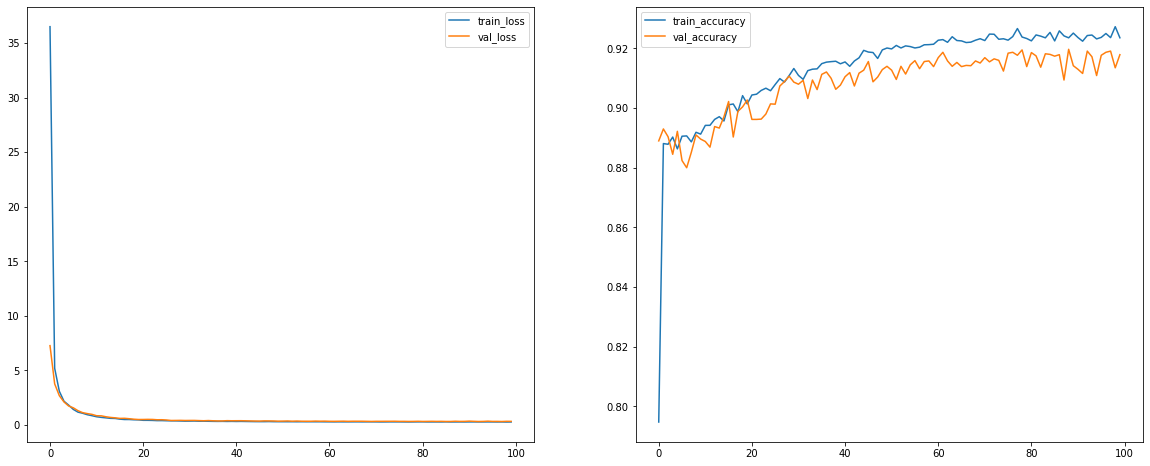

In [84]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss',])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

#With Dropout

In [95]:
len_layers = 5
a_dense_list = [256, 128, 64, 32, 16]
a_dropout_list = [0.1, 0.1, 0.1, 0.1, 0.1]
model_with_dropout = run_model(len_layers, a_dense_list, a_dropout_list, True)

In [96]:
with tf.device('/device:GPU:0'):
  model_with_dropout.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )

In [98]:
with tf.device('/device:GPU:0'):
  history1 = model_with_dropout.fit(
      training_images, trainingLabelsohe, 
      validation_data = (test_images, testLabelsohe),
      epochs = 100,
      batch_size = 800
  )

Epoch 1/100
75/75 [==============================] - 7s 8ms/step - loss: 67.6113 - accuracy: 0.6678 - val_loss: 9.7293 - val_accuracy: 0.8809
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 19.4444 - accuracy: 0.7559 - val_loss: 5.9250 - val_accuracy: 0.8920
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 13.2121 - accuracy: 0.7658 - val_loss: 4.3700 - val_accuracy: 0.8963
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 10.0180 - accuracy: 0.7715 - val_loss: 3.3941 - val_accuracy: 0.9029
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 7.9076 - accuracy: 0.7757 - val_loss: 2.6904 - val_accuracy: 0.9017
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 6.4207 - accuracy: 0.7770 - val_loss: 2.2272 - val_accuracy: 0.9028
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 5.3551 - accuracy: 0.7796 - val_loss: 1.8554 - val_accuracy: 0.9056
Epoch 8/1

In [99]:
print(max(history1.history["val_accuracy"]))

0.9211000204086304


Run this cell to plot the results of the model's training

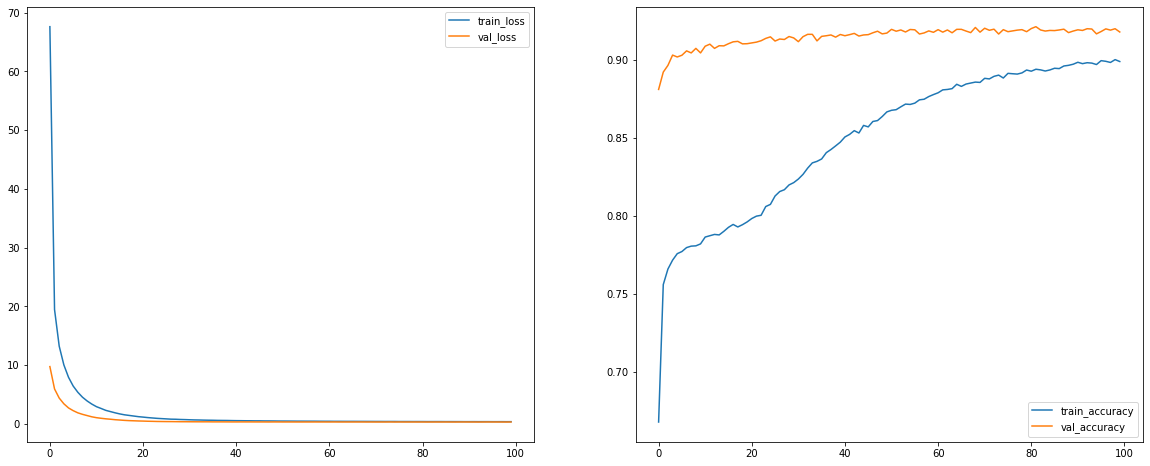

In [100]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train_loss', 'val_loss',])
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()